44100 (7636608,) <class 'numpy.int16'>
Problem dimension = 500000


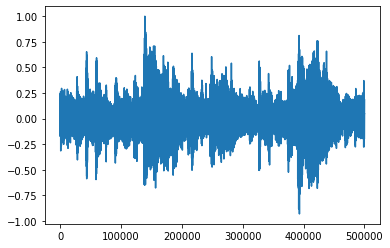

In [1]:
import scipy.io.wavfile as siowav
import numpy as np
import IPython.display as ipd
import matplotlib.pyplot as plt
%matplotlib inline

sr, sound = siowav.read("test_sound.wav")
print(sr, sound.shape, type(sound[0]))
start = 500000
fin = 1000000
sound = sound.astype("float32")
# Cut and normalize original track
sound = sound[start:fin] / np.max(sound[start:fin])
n = sound.shape[0]
print("Problem dimension = {}".format(n))
plt.plot(sound)

In [2]:
ipd.Audio(sound, rate=sr)

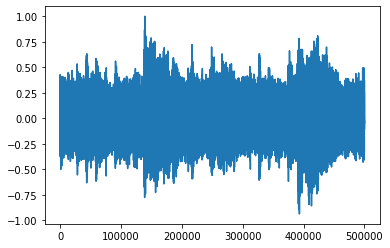

In [3]:
# Create corrupted signal and normalize it 
corrupt_sound = sound + 0.1 * np.random.randn(sound.shape[0])
corrupt_sound = corrupt_sound / np.max(np.abs(corrupt_sound))
plt.plot(corrupt_sound)

In [4]:
ipd.Audio(corrupt_sound, rate=sr)

In [5]:
from skimage.restoration import denoise_tv_chambolle

In [34]:
x = np.zeros(100)
for i in range(100):
    denoised = denoise_tv_chambolle(corrupt_sound, weight=float(i + 1) / 100)
    x[i] = np.linalg.norm(sound - denoised)

In [37]:
np.argmin(x)

58

In [38]:
denoised = denoise_tv_chambolle(corrupt_sound, weight=0.58)

In [39]:
ipd.Audio(denoised, rate=sr)

In [42]:
n = corrupt_sound.shape[0]

(500000,)

In [75]:
x = np.zeros(50)
for j in range (50):
    lamb = (j + 1) / 100
    denoised = np.zeros(n)
    denoised[n - 1] = corrupt_sound[n - 1]
    for i in range(n - 2, -1, -1):
        denoised[i] = (corrupt_sound[i] - lamb * denoised[i + 1]) / (1 - lamb)
    x[j] = np.linalg.norm(sound - denoised)

0

In [69]:
ipd.Audio(denoised, rate=sr)

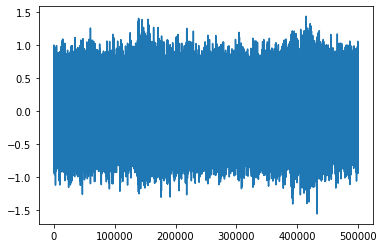

In [70]:
plt.plot(denoised)

In [71]:
np.linalg.norm(sound - denoised)

194.72007039109363